In [ ]:
!pip install pandas==0.25
!pip install investpy==0.8.5
!pip install git+https://github.com/alvarobartt/investpy.git@master

In [1]:
import investpy
import pandas as pd
import random
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Historcal_data = investpy.get_stock_historical_data(stock='RELI', country='India',from_date='01/01/2010',to_date='31/12/2020')
Historcal_data

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-01-04,540.43,540.43,506.13,532.70,35372156,INR
2010-01-05,569.55,569.55,527.70,530.32,9872785,INR
2010-01-06,534.88,542.11,530.30,538.89,10933744,INR
2010-01-07,538.89,552.27,533.94,547.83,12090336,INR
2010-01-08,548.80,551.67,542.85,546.40,6973332,INR
...,...,...,...,...,...,...
2020-12-24,1947.00,1998.80,1945.90,1994.15,9588580,INR
2020-12-28,2006.70,2018.00,1995.30,2003.30,7947720,INR
2020-12-29,2009.00,2012.30,1982.55,1990.05,8589410,INR


In [3]:
temp = Historcal_data["Close"]
df = pd.DataFrame(temp)
df

,Close
Date,
2010-01-04,532.70
2010-01-05,530.32
2010-01-06,538.89
2010-01-07,547.83
2010-01-08,546.40
...,...
2020-12-24,1994.15
2020-12-28,2003.30
2020-12-29,1990.05


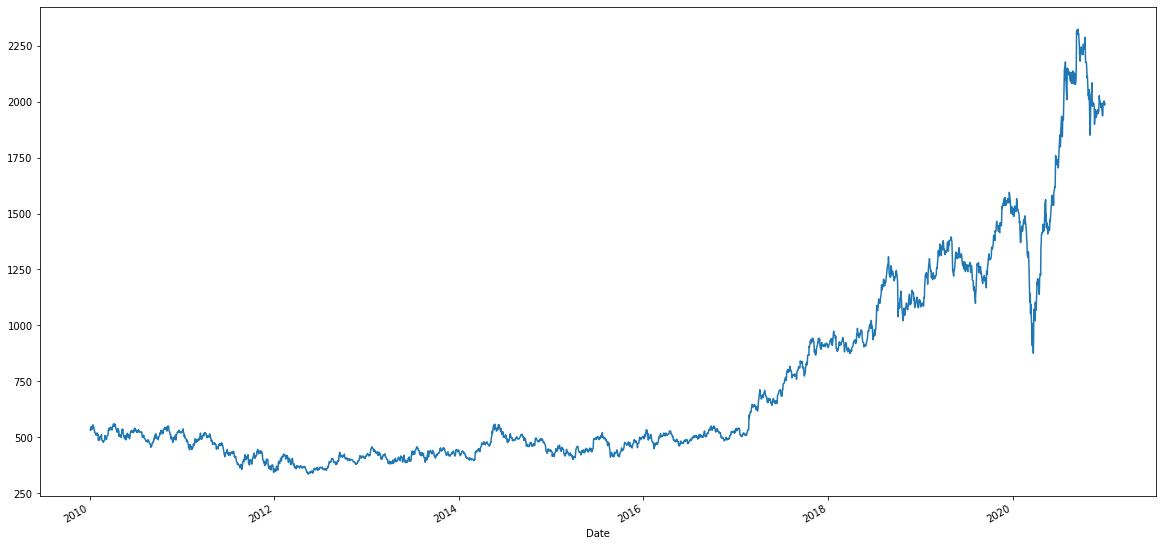

In [4]:
df['Close'].plot(figsize=(20, 10))


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1)) #Converting the close price values between 1 and 0
df

array([[0.09942352],
       [0.09822734],
       [0.10253459],
       ...,
       [0.83188167],
       [0.83462082],
       [0.82949434]])

In [40]:
train_length = int(len(df)*0.60) # 60% assigned for training data 
test_size = len(df) - train_length #Rest 40% for testing data
train_data,test_data=df[0:train_length,:],df[train_length:len(df),:1]

In [41]:
train_length,test_size

(1637, 1092)

In [42]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [43]:
time_step = 200
x_train,y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [44]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
23/23 [==============================] - 15s 431ms/step - loss: 0.0013 - val_loss: 0.0740
Epoch 2/5
23/23 [==============================] - 9s 393ms/step - loss: 1.9130e-04 - val_loss: 0.0049
Epoch 3/5
23/23 [==============================] - 9s 389ms/step - loss: 1.0257e-04 - val_loss: 0.0038
Epoch 4/5
23/23 [==============================] - 9s 386ms/step - loss: 9.7479e-05 - val_loss: 0.0051
Epoch 5/5
23/23 [==============================] - 9s 389ms/step - loss: 9.1235e-05 - val_loss: 0.0034


In [70]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [48]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [49]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.009860458886619601

In [50]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.05821403083180884

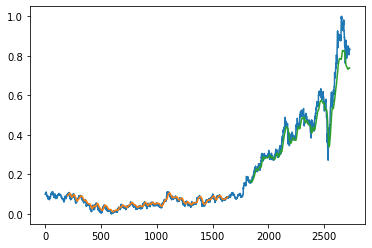

In [76]:
### Plotting 
# shift train predictions for plotting
look_back=200
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#Orange for train dataset
#Green for test dataset

In [78]:
len(test_data)


1092

In [99]:
x_input=test_data[727:].reshape(1,-1)
x_input.shape

(1, 365)

In [100]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [152]:
from numpy import array

lst_output=[]
n_steps=365
i=0
while(i<365):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

Streaming output truncated to the last 5000 lines.
 0.14632988 0.14632438 0.146319   0.14631356 0.14630817 0.14630279
 0.14629748 0.14629215 0.14628686 0.1462816  0.14627632 0.14627112
 0.14626591 0.14626074 0.14625555 0.14625043 0.14624527 0.1462402
 0.14623517 0.1462301  0.14622506 0.14622006 0.14621505 0.14621015
 0.14620516 0.14620024 0.14619535 0.14619049 0.14618562 0.14618078
 0.14617601 0.1461712  0.14616641 0.14616165 0.14615691 0.14615221
 0.14614752 0.14614287 0.14613819 0.14613353 0.14612898 0.14612435
 0.1461198  0.14611524 0.1461107  0.1461062  0.14610171 0.14609726
 0.14609276 0.14608838 0.14608391 0.14607948 0.14607513 0.14607079
 0.14606644 0.14606214 0.14605783 0.14605355 0.14604926 0.14604503
 0.14604081 0.14603658 0.14603239 0.14602825 0.14602405 0.14601994
 0.14601584 0.14601173 0.14600767 0.14600357 0.14599954 0.14599548
 0.14599146 0.1459875  0.14598349 0.14597954 0.1459756  0.1459717
 0.14596775 0.14596388 0.14596002 0.14595611 0.14595233 0.1459485
 0.14594467 0.

In [156]:
year_new=np.arange(1,2600)
year_pred=np.arange(2600,2965)

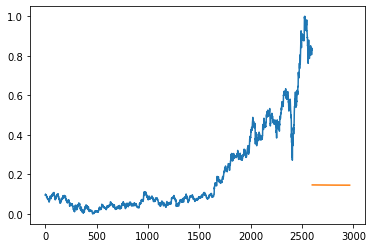

In [158]:
import matplotlib.pyplot as plt

plt.plot(day_new,scaler.inverse_transform(df[130:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))